In [3]:
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
import numpy as np

#### Plots for quality gap given distance val_iou_person_distance

In [2]:
# df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_22_may_24_person_ious_re-evaluated.csv")
# df.columns = df.columns.str.replace("29/08/2024_11:07 - ", "", regex=True)

# df.columns = df.columns.str.replace("per_class/iou/", "", regex=True)
# df.columns = df.columns.str.replace("/person", "m", regex=True)

# relevant_columns=["epoch","0-20m","20-40m","40-60m","60-80m","80-100m"]
# relevant_df = df[relevant_columns]
# bar_names = ["0-20m","20-40m","40-60m","60-80m","80-100m"]
#heights = relevant_df[relevant_df.epoch==1][bar_names]*100


In [59]:
"""Values for baseline from 22.05.24"""
# df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_22_may_24_person_ious_original_values.csv")
# df.columns = df.columns.str.replace("22/05/2024_16:35 - ", "", regex=True)

# df.columns = df.columns.str.replace("per_class/iou/", "", regex=True)
# df.columns = df.columns.str.replace("/person", "m", regex=True)

# relevant_columns=["epoch","0-20m","20-40m","40-60m","60-80m","80-100m"]
# relevant_df = df[relevant_columns]
# bar_names = ["0-20m","20-40m","40-60m","60-80m","80-100m"]
# # heights = relevant_df.iloc[42][bar_names]*100
# heights = relevant_df[relevant_df.epoch==42][bar_names]*100

In [82]:
"""Values for Online past no trick prob 0.0"""
df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_UNPRECISE_ONline_paste_all_tricks.csv")
df.columns = df.columns.str.replace("per_class/iou/", "", regex=True)
df.columns = df.columns.str.replace("/person", "", regex=True)


bar_names = ["0-20m","20-40m","40-60m","60-80m","80-100m"]
heights= df[df["prob_augmentation_paste"]==0][["0-20","20-40","40-60","60-80","80-100"]]*100#.testues.flatten()


In [66]:
# df=pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/24_06_person_stats.csv")
# df.columns = df.columns.str.replace("24/06/2024_15:37 - ", "", regex=True)

# df.columns = df.columns.str.replace("per_class/iou/", "", regex=True)
# df.columns = df.columns.str.replace("/person", "m", regex=True)

# relevant_columns=["epoch","0-20m","20-40m","40-60m","60-80m","80-100m"]
# relevant_df = df[relevant_columns]
# bar_names = ["0-20m","20-40m","40-60m","60-80m","80-100m"]
# heights = relevant_df[relevant_df.epoch==50][bar_names]*100


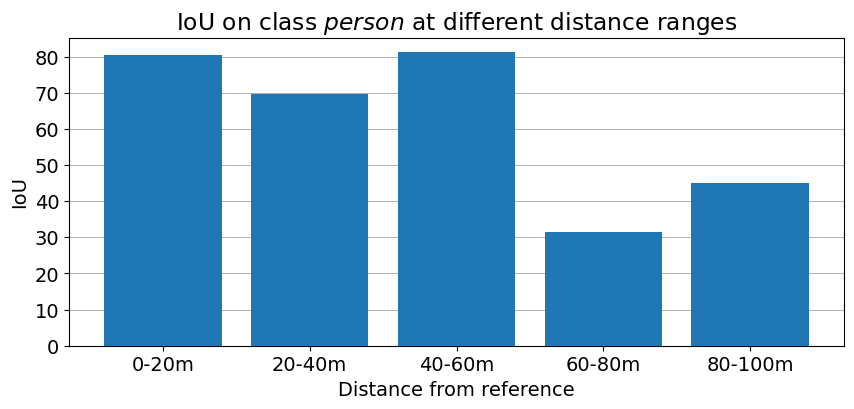

In [67]:
plt.figure(figsize=(10, 4))  # Adjust these testues as needed
plt.rcParams.update({'font.size': 14})  # Set this to your desired font size

plt.yticks(np.arange(0, 100, 10))

# Add horizontal grid lines at each y-axis tick
plt.grid(axis='y', linewidth=0.7,zorder=0)

plt.bar(["0-20m","20-40m","40-60m","60-80m","80-100m"], height=heights.testues.flatten(),zorder=3)
plt.title(r'IoU on class $\it{person}$ at different distance ranges')
plt.xlabel("Distance from reference")
plt.ylabel("IoU")

# plt.savefig('/workspaces/baseline/exp/figures/report_figs/IoU_person_distances.eps',format="eps", bbox_inches='tight')
plt.show()



In [68]:
import plotly.express as px
import pandas as pd

# Assuming 'heights' is a pandas DataFrame or Series with the IoU values
# Replace with your actual data
#heights = pd.Series([0.75, 0.65, 0.55, 0.45, 0.35])

# Define the categories
categories = ["0-20m", "20-40m", "40-60m", "60-80m", "80-100m"]

# Create a DataFrame for Plotly
df = pd.DataFrame({"Distance from reference": categories, "IoU": heights.values.flatten()})

# Create the bar plot
fig = px.bar(df, x="Distance from reference", y="IoU", 
             labels={"IoU": "IoU", "Distance from reference": "Distance from reference"},
             title='IoU on class person at different distance ranges')

fig.update_layout(
    title=dict(font=dict(size=20)),
    margin=dict(l=20, r=20, t=30, b=20),
    xaxis_title_font=dict(size=18),  # X-axis title font size
    yaxis_title_font=dict(size=18),  # Y-axis title font size
    xaxis=dict(tickfont=dict(size=16)),  # X-axis tick font size
    yaxis=dict(tickfont=dict(size=16)),  # Y-axis tick font size
    title_x=0.5
)

fig.update_layout(
    autosize=False,
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=40, b=20),
    yaxis=dict(tickvals=np.arange(0,111,10))
)

# Update the axes labels
fig.update_xaxes(title_text="Distance from reference")
fig.update_yaxes(title_text="IoU")

# Save the figure
# fig.write_image('/workspaces/baseline/exp/figures/report_figs/IoU_person_distances_22_05_24.png', scale=4)
# fig.write_image('/workspaces/baseline/exp/figures/report_figs/IoU_person_distances_ONlinePasteAllTricks0_0.png', scale=4)

# Show the figure
fig.show()


### Distribution of samples per distances

In [22]:
# Uncomment to load csv
pedestrian_df = pd.read_csv("/workspaces/baseline/railseg/csv_stats/pedestrian_density_per_distance.csv")
training_pedestrian_df = pedestrian_df[pedestrian_df["split"]=="train"]
bucket_size = 5
# Step 1: Create distance buckets
training_pedestrian_df['dist_bucket'] = (training_pedestrian_df['dist'] // bucket_size) * bucket_size

# Step 2: Group by distance buckets and calculate the mean of nb_points and mean_intensity, and count the number of samples
result = training_pedestrian_df.groupby('dist_bucket').agg(
    mean_nb_pts=('nb_points', 'mean'),
    mean_intensity=('mean_intensity','mean'),
    dist=('dist', 'count'),
    total_nb_pts=("nb_points","sum")
).reset_index()

# Step 3: Rename the 'dist' column to 'sample_count' to reflect the number of samples
result = result.rename(columns={'dist': 'sample_count'})


/tmp/ipykernel_830300/1223256825.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:

fig=px.bar(result[result.dist_bucket<100], "dist_bucket","sample_count", title="Number of <i>person</i> instances per distance range (for Train split)")
fig.update_layout(xaxis_title=f"Distances [m]", yaxis_title="Number of samples",title_x=0.5)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)
fig.update_layout(
xaxis = dict(
                    tickmode='array', #change 1
                    tickvals = np.arange(-2.5,125,20), #change 2
                    ticktext = np.arange(0,130,20), #change 3
                    ),)

fig.update_xaxes(ticklabelposition='outside top')
for i in range(0, 110, 20):
    fig.add_vline(x=i - 2.5, line_width=1)
fig.update_layout(
    title=dict(font=dict(size=20)),
    margin=dict(l=20, r=20, t=30, b=20),
    xaxis_title_font=dict(size=18),  # X-axis title font size
    yaxis_title_font=dict(size=18),  # Y-axis title font size
    xaxis=dict(tickfont=dict(size=16)),  # X-axis tick font size
    yaxis=dict(tickfont=dict(size=16))  # Y-axis tick font size
)
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/person_instances_per_dist_train.png", scale=4)
fig.show()


#### Distribution of the average number of points per sample

In [24]:
# fig=px.bar(result, "dist_bucket","nb_points", title="Average number of points per person instance, <br>according to their planar distance to sensor (in Train split)")
# fig.update_layout(xaxis_title=f"Distance ranges [x:x+{bucket_size}]", yaxis_title="Average number of point per person instance")


fig=px.bar(result[result.dist_bucket<100], "dist_bucket","mean_nb_pts", title="Average number of points per person instance, according to their planar distance to sensor (in Train split)")
fig.update_layout(xaxis_title=f"Distances [m]", yaxis_title="Avg. nb. of points per instance",title_x=0.5)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)
fig.update_layout(
xaxis = dict(
                    tickmode='array', #change 1
                    tickvals = np.arange(-2.5,125,20), #change 2
                    ticktext = np.arange(0,130,20), #change 3
                    ),)

fig.update_xaxes(ticklabelposition='outside top')
for i in range(0, 110, 20):
    fig.add_vline(x=i - 2.5, line_width=1)
fig.update_layout(
    title=dict(font=dict(size=20)),
    margin=dict(l=20, r=20, t=30, b=20),
    xaxis_title_font=dict(size=18),  # X-axis title font size
    yaxis_title_font=dict(size=18),  # Y-axis title font size
    xaxis=dict(tickfont=dict(size=16)),  # X-axis tick font size
    yaxis=dict(tickfont=dict(size=16))  # Y-axis tick font size
)
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/train_split_avg_nb_pts_per_instance.png", scale=4)
fig.show()


FOR VALIDATION!!!, number of points for class person in total

In [32]:
# Uncomment to load csv
pedestrian_df = pd.read_csv("/workspaces/baseline/railseg/csv_stats/pedestrian_density_per_distance.csv")
val_pedestrian_df = pedestrian_df[pedestrian_df["split"]=="val"]
bucket_size = 5
# Step 1: Create distance buckets
val_pedestrian_df['dist_bucket'] = (val_pedestrian_df['dist'] // bucket_size) * bucket_size

# Step 2: Group by distance buckets and calculate the mean of nb_points and mean_intensity, and count the number of samples
result_val = val_pedestrian_df.groupby('dist_bucket').agg(
    mean_nb_pts=('nb_points', 'mean'),
    mean_intensity=('mean_intensity','mean'),
    dist=('dist', 'count'),
    total_nb_pts=("nb_points","sum")
).reset_index()

# Step 3: Rename the 'dist' column to 'sample_count' to reflect the number of samples
result_val= result_val.rename(columns={'dist': 'sample_count'})


/tmp/ipykernel_830300/1479002818.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
# fig=px.bar(result, "dist_bucket","nb_points", title="Average number of points per person instance, <br>according to their planar distance to sensor (in Train split)")
# fig.update_layout(xaxis_title=f"Distance ranges [x:x+{bucket_size}]", yaxis_title="Average number of point per person instance")


fig=px.bar(result_val[result_val.dist_bucket<100], "dist_bucket","total_nb_pts", title="Average number of points per person instance, according to their planar distance to sensor (in Train split)")
fig.update_layout(xaxis_title=f"Distances [m]", yaxis_title="Total. nb. of person points",title_x=0.5)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)
fig.update_layout(
xaxis = dict(
                    tickmode='array', #change 1
                    tickvals = np.arange(-2.5,125,20), #change 2
                    ticktext = np.arange(0,130,20), #change 3
                    ),)

fig.update_xaxes(ticklabelposition='outside top')
for i in range(0, 110, 20):
    fig.add_vline(x=i - 2.5, line_width=1)
fig.update_layout(
    title=dict(font=dict(size=20)),
    margin=dict(l=20, r=20, t=30, b=20),
    xaxis_title_font=dict(size=18),  # X-axis title font size
    yaxis_title_font=dict(size=18),  # Y-axis title font size
    xaxis=dict(tickfont=dict(size=16)),  # X-axis tick font size
    yaxis=dict(tickfont=dict(size=16))  # Y-axis tick font size
)
# fig.update_yaxes(type="log")
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/train_split_avg_nb_pts_per_instance.png", scale=4)
fig.show()


Values for TEST split

In [31]:
# Uncomment to load csv
pedestrian_df = pd.read_csv("/workspaces/baseline/railseg/csv_stats/pedestrian_density_per_distance.csv")
test_pedestrian_df = pedestrian_df[pedestrian_df["split"]=="test"]
bucket_size = 5
# Step 1: Create distance buckets
test_pedestrian_df['dist_bucket'] = (test_pedestrian_df['dist'] // bucket_size) * bucket_size

# Step 2: Group by distance buckets and calculate the mean of nb_points and mean_intensity, and count the number of samples
result_test = test_pedestrian_df.groupby('dist_bucket').agg(
    mean_nb_pts=('nb_points', 'mean'),
    mean_intensity=('mean_intensity','mean'),
    dist=('dist', 'count'),
    total_nb_pts=("nb_points","sum")
).reset_index()

# Step 3: Rename the 'dist' column to 'sample_count' to reflect the number of samples
result_test= result_test.rename(columns={'dist': 'sample_count'})


/tmp/ipykernel_146628/768759292.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# fig=px.bar(result, "dist_bucket","nb_points", title="Average number of points per person instance, <br>according to their planar distance to sensor (in Train split)")
# fig.update_layout(xaxis_title=f"Distance ranges [x:x+{bucket_size}]", yaxis_title="Average number of point per person instance")


fig=px.bar(result_test[result_test.dist_bucket<100], "dist_bucket","total_nb_pts", title="Average number of points per person instance, according to their planar distance to sensor (in TEST split)")
fig.update_layout(xaxis_title=f"Distances [m]", yaxis_title="Total. nb. of person points",title_x=0.5)
fig.update_layout(
    autosize=False,
    width=800,
    height=400,
)
fig.update_layout(
xaxis = dict(
                    tickmode='array', #change 1
                    tickvals = np.arange(-2.5,125,20), #change 2
                    ticktext = np.arange(0,130,20), #change 3
                    ),)

fig.update_xaxes(ticklabelposition='outside top')
for i in range(0, 110, 20):
    fig.add_vline(x=i - 2.5, line_width=1)
fig.update_layout(
    title=dict(font=dict(size=20)),
    margin=dict(l=20, r=20, t=30, b=20),
    xaxis_title_font=dict(size=18),  # X-axis title font size
    yaxis_title_font=dict(size=18),  # Y-axis title font size
    xaxis=dict(tickfont=dict(size=16)),  # X-axis tick font size
    yaxis=dict(tickfont=dict(size=16))  # Y-axis tick font size
)
# fig.update_yaxes(type="log")
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/total_person_pts_test_set.png", scale=4)
fig.show()


In [40]:
pedestrian_df[(pedestrian_df["dist"]>40)&(pedestrian_df["dist"]<45) & (pedestrian_df["split"]=="test")]#["scene_name"].value_counts()

,Unnamed: 0,dist,nb_points,mean_intensity,scene_name,split
54,54,40.601387,293,23.812287,4_station_pedestrian_bridge_4.4,test
62,62,40.662023,263,25.377807,4_station_pedestrian_bridge_4.4,test
70,70,40.461127,278,25.384892,4_station_pedestrian_bridge_4.4,test
78,78,40.650317,247,24.275304,4_station_pedestrian_bridge_4.4,test
86,86,40.657629,248,24.236423,4_station_pedestrian_bridge_4.4,test
...,...,...,...,...,...,...
822,822,40.665102,236,25.546610,4_station_pedestrian_bridge_4.4,test
830,830,40.581013,253,24.426877,4_station_pedestrian_bridge_4.4,test
838,838,40.667676,237,24.535865,4_station_pedestrian_bridge_4.4,test
846,846,40.655450,235,25.710638,4_station_pedestrian_bridge_4.4,test


### Plotting **on**line sweep paste results 

In [24]:
#df=pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_sweep_online_paste.csv") # Original non precise value
# df=pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_PRECISE_results_ONline_paste.csv")

# df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_PRECISE_results_ONline_paste_more_columns.csv") # Values from https://wandb.ai/nmuenger/RESULTS_Precise_test_ONline_paste?nw=nwusernmuenger

df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_UNPRECISE_ONline_paste_all_tricks.csv") # Values from https://wandb.ai/nmuenger/training_paste_ONLINE_with_all_tricks/workspace

display(df.head(1))
df = df.iloc[:,1:] # Remove useless column with name of single experiment
df = df.set_axis(['Augmentation value', '0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU', '100-140m rIoU', '140-180m rIoU', 'Complete IoU', 'mIoU on all classes<br>& ranges'], axis=1) # Rename columns with desired names
print("After modification of the column names:")
display(df.head(1))

,Name,prob_augmentation_paste,per_class/iou/0-20/person,per_class/iou/20-40/person,per_class/iou/40-60/person,per_class/iou/60-80/person,per_class/iou/80-100/person,per_class/iou/100-140/person,per_class/iou/140-180/person,per_class/iou/total/person,val/total/mIoU
0,2nd Online paste 1.0,1.0,0.769476,0.697513,0.772082,0.515967,0.531198,0.273646,0.152842,0.692933,0.756373


After modification of the column names:


,Augmentation value,0-20m rIoU,20-40m rIoU,40-60m rIoU,60-80m rIoU,80-100m rIoU,100-140m rIoU,140-180m rIoU,Complete IoU,mIoU on all classes<br>& ranges
0,1.0,0.769476,0.697513,0.772082,0.515967,0.531198,0.273646,0.152842,0.692933,0.756373


In [25]:
df["Mean rIoU 0-100m"] = df[['0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU']].sum(axis=1)/5
df_0_to_100 = df.drop(columns=["100-140m rIoU", "140-180m rIoU","mIoU on all classes<br>& ranges"]) # Remove unused columns

# Create suitable plot for bar plot with plotly
melted_df = df_0_to_100.melt(id_vars=["Augmentation value"],
                        var_name="Range",
                        value_name="IoU")
melted_df = melted_df.sort_values(by=["Range","Augmentation value"]) # Sort values in a good way
melted_df["IoU"] =melted_df["IoU"]*100 # Get IoU between 0-100 to be consistent

In [26]:
values_with_no_augmentation = df[df["Augmentation value"]==0]

In [27]:
color_map = {
    '0-20m IoU': '#2db1ba',       
    '20-40m IoU': '#6387cd',      
    '40-60m IoU': '#985de0',      
    '60-80m IoU': '#ac6cb0',      
    '80-100m IoU': '#c07b80',     
    '100-140m IoU': '#d48a50',   
    '140-180m IoU': '#e89820',   
    '0-max IoU': '#7f7f7f',       # Gray
    'Averaged range IoU': '#bcbd22', # Yellow-Green
    'mIoU on all classes<br>& ranges': '#000000'  
}


def return_fig_line_plot(melted_df, x_axis_title, plot_title, category_orders, y_axis_title="IoU"):
    fig = px.line(melted_df.sort_values("Augmentation value"),x="Augmentation value", y="IoU",color="Range", category_orders=category_orders,
                title=plot_title, markers=True,) #color_discrete_map=color_map) # Uncoment to use special color map

    fig.update_traces(line=dict(dash="dot"),
            selector=dict(name="Mean rIoU 0-100m")) # Set "general" line as dotted
    fig.update_traces(line=dict(dash="dot"),
            selector=dict(name="Complete IoU")) # Set "general" line as dotted

    fig.update_traces(marker=dict(size=6,))
                
    fig.update_layout(
        title=dict(font=dict(size=20)),
        xaxis_title_font=dict(size=18),  # X-axis title font size
        yaxis_title_font=dict(size=18),  # Y-axis title font size
        xaxis=dict(tickfont=dict(size=16)),  # X-axis tick font size
        yaxis=dict(tickfont=dict(size=16)),  # Y-axis tick font size
        title_x=0.5
    )

    fig.update_layout(
        autosize=False,
        width=800,
        height=500,
        margin=dict(l=20, r=20, t=70, b=20),
        xaxis = dict(
                        tickmode='array', #change 1
                        tickvals = np.arange(0,1.1,0.1), #change 2
                        ticktext = np.round(np.arange(0,1.1,0.1),2), #change 3
                        ),
    )

    # Update the axes labels
    fig.update_xaxes(title_text=x_axis_title)
    fig.update_yaxes(title_text=y_axis_title)

    fig.update_xaxes(range = [0,1])
 
    return fig

In [28]:
fig = return_fig_line_plot(melted_df, "Prob. on the fly augmentation", 'IoUs for class person, given range to sensor. <br>On the fly augmentation procedure',
                           category_orders={"Range": ['0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU', "Mean rIoU 0-100m", 'Complete IoU']})
fig.show()
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/RAW_ONline_paste_augmentation_line_plot_0_to_100.jpeg", scale=4)

In [29]:
melted_df[melted_df["Augmentation value"]==0.8].round(2)

,Augmentation value,Range,IoU
2,0.8,0-20m rIoU,78.66
13,0.8,20-40m rIoU,70.12
24,0.8,40-60m rIoU,78.49
35,0.8,60-80m rIoU,49.92
46,0.8,80-100m rIoU,57.76
57,0.8,Complete IoU,70.21
68,0.8,Mean rIoU 0-100m,66.99


### Plotting **off**line sweep paste results 

In [13]:
# df=pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_sweep_offline_paste.csv")
# df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/IoU_OFFline_paste_UNprecise_result.csv")
#df  =pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_PRECISE_results_OFFline_paste.csv")

#df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_PRECISE_results_OFFline_paste_more_columns.csv") # https://wandb.ai/nmuenger/RESULTS_Precise_test_OFFline_paste?nw=nwusernmuenger
df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_UNPRECISE_OFFline_paste.csv") # https://wandb.ai/nmuenger/training_paste_OFFLINE?nw=nwusernmuenger

df = df.iloc[:,1:] # Remove useless column with name of single experiment
df = df.set_axis(['Augmentation value', '0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU', '100-140m rIoU', '140-180m rIoU', 'Complete IoU', 'mIoU on all classes<br>& ranges'], axis=1) 

In [14]:
df["Mean rIoU 0-100m"] = df[['0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU']].sum(axis=1)/5

# Modifiy with the value of online plot. It's just for consistency
df[df["Augmentation value"]==0] = values_with_no_augmentation 

df_0_to_100 = df.drop(columns=["100-140m rIoU", "140-180m rIoU","mIoU on all classes<br>& ranges"]) # Remove unused columns



# Create suitable plot for bar plot with plotly
melted_df = df_0_to_100.melt(id_vars=["Augmentation value"],
                        var_name="Range",
                        value_name="IoU")
melted_df = melted_df.sort_values(by=["Range","Augmentation value"]) # Sort values in a good way
melted_df["IoU"] =melted_df["IoU"]*100 # Get IoU between 0-100 to be consistent

In [15]:
fig = return_fig_line_plot(melted_df, "Augmentation ratio of training set", 'IoUs for class person, given range to sensor. <br>Augmentation applied on added samples',
                           category_orders={"Range": ['0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU', "Mean rIoU 0-100m", 'Complete IoU']})
fig.show()
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/RAW_OFFline_paste_augmentation_line_plot_0_to_100.jpeg", scale=4)

In [22]:
melted_df[melted_df["Augmentation value"]== 0.1].round(2)

,Augmentation value,Range,IoU
9,0.1,0-20m rIoU,80.98
20,0.1,20-40m rIoU,70.12
31,0.1,40-60m rIoU,79.46
42,0.1,60-80m rIoU,44.59
53,0.1,80-100m rIoU,58.70
64,0.1,Complete IoU,71.80
75,0.1,Mean rIoU 0-100m,66.77


#### With the "no rotation" and "no put to the back"

In [24]:
df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_UNPRECISE_ONline_paste_NoRot_WithPutToBack.csv")


df = df.iloc[:,1:] # Remove useless column with name of single experiment
df = df.set_axis(['Augmentation value', '0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU', '100-140m rIoU', '140-180m rIoU', 'Complete IoU', 'mIoU on all classes<br>& ranges'], axis=1) 

In [25]:
df = pd.concat((df, values_with_no_augmentation)) # Add the balue from another sweep for "no augmentation". It is the same since in both case the probability of going through the transform is 0.0.

In [26]:
df["Mean rIoU 0-100m"] = df[['0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU']].sum(axis=1)/5
df_0_to_100 = df.drop(columns=["100-140m rIoU", "140-180m rIoU","mIoU on all classes<br>& ranges"]) # Remove unused columns

# Create suitable plot for bar plot with plotly
melted_df = df_0_to_100.melt(id_vars=["Augmentation value"],
                        var_name="Range",
                        value_name="IoU")
melted_df = melted_df.sort_values(by=["Range","Augmentation value"]) # Sort values in a good way
melted_df["IoU"] =melted_df["IoU"]*100 # Get IoU between 0-100 to be consistent

In [28]:
fig = return_fig_line_plot(melted_df, "Prob. on the fly augmentation", 'IoUs for class person, given range to sensor. <br>On the fly augmentation procedure',
                           category_orders={"Range": ['0-20m rIoU', '20-40m rIoU', '40-60m rIoU', '60-80m rIoU', '80-100m rIoU', "Mean rIoU 0-100m", 'Complete IoU']})
fig.show()
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/RAW_ONline_paste_augmentation_NoRot_WithPutToBackline_plot_0_to_100.jpeg", scale=4)

#### With the no rotation BUT WITH put to back

### To create the plot of person pose, go in the notebook "track_plots" and to the section about "tack error map" and do what it says. It will create the same plots.

Create comparison between baseline (22_05) ( between online paste 0.0 and 0.8)

In [27]:

df = pd.read_csv("/workspaces/baseline/exp/data_for_plot_creation/wandb_riou_testset_baseline13_08_24_vs_bestPASTE.csv")

In [28]:
df

,epoch,weight: online paste p=0.8 - _step,weight: online paste p=0.8 - _step__MIN,weight: online paste p=0.8 - _step__MAX,weight: online paste p=0.8 - per_class/iou/0-20/person,weight: online paste p=0.8 - per_class/iou/0-20/person__MIN,weight: online paste p=0.8 - per_class/iou/0-20/person__MAX,weight: online paste p=0.8 - per_class/iou/20-40/person,weight: online paste p=0.8 - per_class/iou/20-40/person__MIN,weight: online paste p=0.8 - per_class/iou/20-40/person__MAX,...,weight: online paste p=0.0 - per_class/iou/20-40/person__MAX,weight: online paste p=0.0 - per_class/iou/40-60/person,weight: online paste p=0.0 - per_class/iou/40-60/person__MIN,weight: online paste p=0.0 - per_class/iou/40-60/person__MAX,weight: online paste p=0.0 - per_class/iou/60-80/person,weight: online paste p=0.0 - per_class/iou/60-80/person__MIN,weight: online paste p=0.0 - per_class/iou/60-80/person__MAX,weight: online paste p=0.0 - per_class/iou/80-100/person,weight: online paste p=0.0 - per_class/iou/80-100/person__MIN,weight: online paste p=0.0 - per_class/iou/80-100/person__MAX
0,1,22,2,42,0.857769,0.857769,0.857769,0.665827,0.665827,0.665827,...,0.631002,0.788268,0.788268,0.788268,0.494804,0.494804,0.494804,0.505758,0.505758,0.505758
1,2,123,103,143,0.856545,0.856545,0.856545,0.670063,0.670063,0.670063,...,0.629873,0.788593,0.788593,0.788593,0.496165,0.496165,0.496165,0.507907,0.507907,0.507907
2,3,224,204,244,0.856894,0.856894,0.856894,0.671133,0.671133,0.671133,...,0.629479,0.788512,0.788512,0.788512,0.498951,0.498951,0.498951,0.508516,0.508516,0.508516
3,4,325,305,345,0.856892,0.856892,0.856892,0.670955,0.670955,0.670955,...,0.628179,0.787731,0.787731,0.787731,0.501123,0.501123,0.501123,0.510496,0.510496,0.510496
4,5,426,406,446,0.856576,0.856576,0.856576,0.671130,0.671130,0.671130,...,0.627812,0.787784,0.787784,0.787784,0.503690,0.503690,0.503690,0.510222,0.510222,0.510222
5,6,527,507,547,0.856388,0.856388,0.856388,0.670997,0.670997,0.670997,...,0.628253,0.788047,0.788047,0.788047,0.501037,0.501037,0.501037,0.510947,0.510947,0.510947


In [32]:
df.columns = df.columns.str.replace("weight: online paste p=0.0 -", "baseline", regex=True)
df.columns = df.columns.str.replace("weight: online paste p=0.8 -", "best",regex=True)
df.columns = df.columns.str.replace("per_class/iou/", "", regex=True)
df = df.drop(columns=[col for col in df.columns if 'MIN' in col or 'MAX' in col]) # Remove the useless columns that wandb generates
df.columns = df.columns.str.replace("/person", "m", regex=True)

In [33]:
df

,epoch,best _step,best 0-20m,best 20-40m,best 40-60m,best 60-80m,best 80-100m,baseline _step,baseline 0-20m,baseline 20-40m,baseline 40-60m,baseline 60-80m,baseline 80-100m
0,1,22,0.857769,0.665827,0.672498,0.609020,0.591869,22,0.863131,0.631002,0.788268,0.494804,0.505758
1,2,123,0.856545,0.670063,0.676234,0.607126,0.592259,123,0.861785,0.629873,0.788593,0.496165,0.507907
2,3,224,0.856894,0.671133,0.677691,0.607384,0.596290,224,0.862129,0.629479,0.788512,0.498951,0.508516
3,4,325,0.856892,0.670955,0.677224,0.606996,0.593299,325,0.862008,0.628179,0.787731,0.501123,0.510496
4,5,426,0.856576,0.671130,0.677901,0.605859,0.595129,426,0.862260,0.627812,0.787784,0.503690,0.510222
5,6,527,0.856388,0.670997,0.678633,0.605199,0.594323,527,0.862256,0.628253,0.788047,0.501037,0.510947


In [34]:
["0-20m", "20-40m", "40-60m", ]
x = ["0-20m", "20-40m", "40-60m", "60-80m", "80-100m"]
y_baseline = df[df["epoch"]==1][["baseline 0-20m", "baseline 20-40m", "baseline 40-60m", "baseline 60-80m", "baseline 80-100m"]]
y_best = df[df["epoch"]==1][["best 0-20m", "best 20-40m", "best 40-60m", "best 60-80m", "best 80-100m"]]


In [35]:
df_baseline = pd.DataFrame.from_dict({"Range":x,"rIoU":y_baseline.values.flatten()*100, "Run":["Baseline"]*5})
df_best = pd.DataFrame.from_dict({"Range":x,"rIoU":y_best.values.flatten()*100, "Run":["Best"]*5})
plot_df = pd.concat((df_best,df_baseline))

In [37]:
fig = px.bar(plot_df, x="Range", y="rIoU", color="Run", barmode="group")

# Update layout to adjust font sizes and legend position
fig.update_layout(
    width=800,
    height=400,
    xaxis_title_font=dict(size=16),  # Set x-axis title font size
    yaxis_title_font=dict(size=16),  # Set y-axis title font size
    legend_font=dict(size=14),       # Set legend font size
    legend=dict(yanchor="top", y=1, xanchor="right", x=1),           # Move legend to the left (adjust x as needed)
    margin={'t':0,'l':0,'b':0,'r':0}
)

# Update x and y axis ticks font size
fig.update_xaxes(tickfont=dict(size=14))  # Set x-axis tick font size
fig.update_yaxes(tickfont=dict(size=14))  # Set y-axis tick font size

# Show the plot
fig.show()
# fig.write_image("/workspaces/baseline/exp/figures/report_figs/TEST_SET_bar_plot_iou_person_compare.jpeg", scale=4)